# RAICES DE ECUACIONES

---
# MÉTODO GRÁFICO
Para mostrar el procedimiento del método vamos utilizar el ejemplo de caida libre de un paracaidista expresado de la siguiten forma:

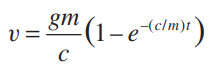

Donde:
*   (masa)        m = 68.1 [Kg]
*   (velocidad)   v = 40 [m/s]
*   (tiempo)      t = 10 [s]
*   (gravedad)    g = 9.8 [m/s¨2]

Vamos a reconstruir la formula y llevarlo a la forma de f(x) = 0 para poder encontrar alguna raiz de la ecuación, es este caso la variable independiente es c.

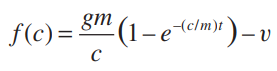

Podemos evaluar nuestra función y determinar las imagenes de dichos puntos para ver en que rango existe un cambio de signo:

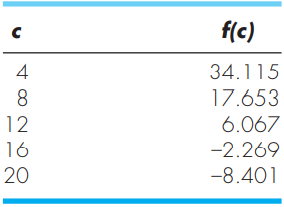

Solamente con realizar este paso podemos ver que la solución c entre los rangos 12 y 16, ya que en medio de esos puntos podemos encontrar un cambio de signo al evaluarla en la función.

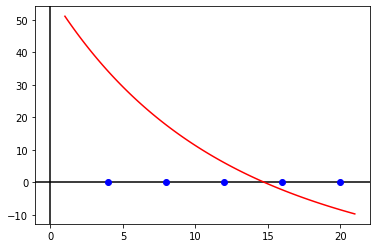

    c       f(c)
0   4  34.114844
1   8  17.653428
2  12   6.066936
3  16  -2.268762
4  20  -8.400629


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
  return ((9.8 * 68.1) / x) * (1 - np.exp((-x / 68.1) * 10)) - 40

x = np.linspace(1, 21, 100)
y = f(x)
x2 = np.arange(4, 21, 4)
y2 = f(x2)

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.plot(x, y,color="red")
#plt.plot(x2, y2, color="green")
plt.plot(x2, [0 for i in range(len(x2))], 'o', color='blue')
plt.show()

df = pd.DataFrame(list(zip(x2, y2)), columns = ['c','f(c)'])
print(df)

# MÉTODO DE BISECCIÓN
Bisección emplea un intevalo para poder encontrar una raiz aproximada de la función.
Solo es necesario tener los puntos a y b, dónde f(a)*f(b) > 0. 

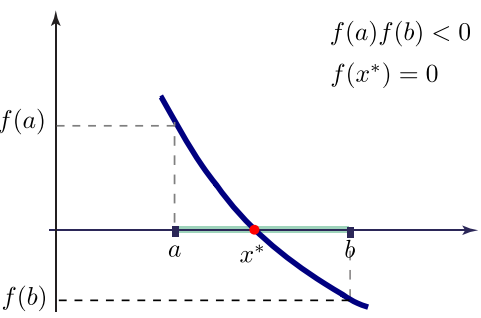

En otras palabras, la gráfica debe intersecar con el eje de las abcisas para asegurar la existencia de alguna solución.

Se empleará la media entre dos puntos para determinar posibles soluciones.

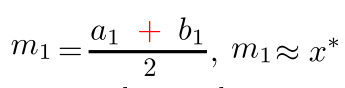

Una vez realizado este proceso se modifican los nuevos intervalos de la siguiente manera:

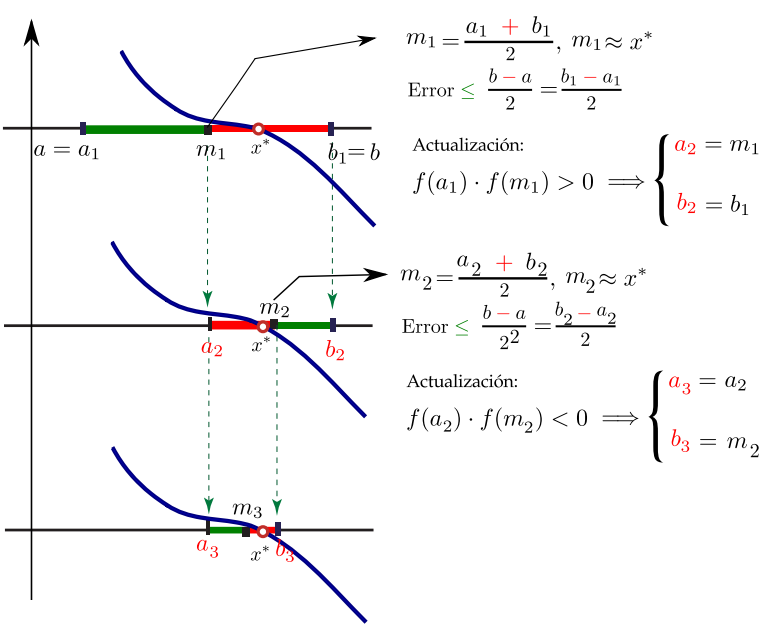


           a         b         m      f(a)       f(b)      f(m)
0   2.000000  3.000000  2.500000 -3.000000  10.000000  1.625000
1   2.000000  2.500000  2.250000 -3.000000   1.625000 -1.109375
2   2.250000  2.500000  2.375000 -1.109375   1.625000  0.146484
3   2.250000  2.375000  2.312500 -1.109375   0.146484 -0.508545
4   2.312500  2.375000  2.343750 -0.508545   0.146484 -0.187897
5   2.343750  2.375000  2.359375 -0.187897   0.146484 -0.022434
6   2.359375  2.375000  2.367188 -0.022434   0.146484  0.061592
7   2.359375  2.367188  2.363281 -0.022434   0.061592  0.019471
8   2.359375  2.363281  2.361328 -0.022434   0.019471 -0.001509
9   2.361328  2.363281  2.362305 -0.001509   0.019471  0.008974
10  2.361328  2.362305  2.361816 -0.001509   0.008974  0.003731
11  2.361328  2.361816  2.361572 -0.001509   0.003731  0.001111
12  2.361328  2.361572  2.361450 -0.001509   0.001111 -0.000199
Raiz aproximada: x = 2.3614501953125


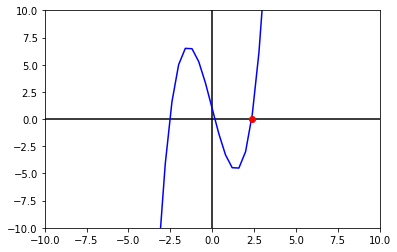

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def f(x):
    return x**3 - 6*x + 1

def Biseccion(a, b, tol):
  res = pd.DataFrame(columns = ['a' , 'b', 'm', 'f(a)', 'f(b)', 'f(m)'])
  i = 0
  while(True):
      m = (a + b) / 2
      res.loc[i]=[a, b, m, f(a), f(b), f(m)]
      i += 1
      if(f(a) * f(m) < 0):
          b = m
      elif(f(m) * f(b) < 0):
          a = m
      else:
          print("Se hallo una solucion: x =", m)
          break
      if(abs(f(m)) < tol):
          break
  print(res)
  print("Raiz aproximada: x =", m)
  x = np.linspace(-10, 10, 51)
  y = f(x)
  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(x, y, color="blue")
  plt.plot(m, f(m), marker="o",color="red")
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.show()

Biseccion(a=2, b=3, tol=0.0005)

# MÉTODO DE PUNTO FIJO
Es el primer método abierto que tiene la siguiente forma de trabajo:

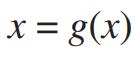

Nos basamos en despejar una X de nuestra función y empezar a operar, se pueden realizar OPERACIONES ALGEBRAICAS para cumplir este objetivo. (Despejando o sumando una X a ambos extremos de la función).

Para realizar esa tramsormación debemos tener a la función f(x) = 0.
Resolveremos el siguiente ejercicio:

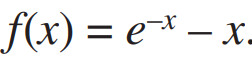

Al cual mediante operaciones podemos despejar una X y tenemos el siguiente resultado:

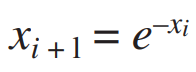

Con esta nueva función probaremos el método. Necesitamos conocer un valor inicial de X para empezar con el método.

           x     Error
0   1.000000  1.000000
1   0.367879  0.632121
2   0.692201  0.324321
3   0.500474  0.191727
4   0.606244  0.105770
5   0.545396  0.060848
6   0.579612  0.034217
7   0.560115  0.019497
8   0.571143  0.011028
9   0.564879  0.006264
10  0.568429  0.003549
11  0.566415  0.002014
12  0.567557  0.001142
13  0.566909  0.000648
Raiz aproximada: x = 0.5672762321755696


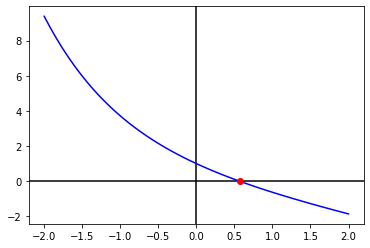

In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def f(x):
    return np.exp(-x) - x
def g(x):
    return np.exp(-x)
def Punto_Fijo(x0, tol):
  res = pd.DataFrame(columns = ['x' , 'Error'])
  i = 0
  x = g(x0)
  while(abs(x - x0) > tol):
      res.loc[i]=[x, abs(x - x0)]     
      i += 1
      x0 = x
      x = g(x0)
  print(res)
  print("Raiz aproximada: x =", x)

  xi = np.linspace(-2, 2, 51)
  yi = f(xi)
  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(xi, yi, color="blue")
  plt.plot(x, f(x), marker="o",color="red")

  plt.show()

Punto_Fijo(x0=0, tol=0.0005)

# MÉTODO DE NEWTON-RAPHSON
Al igual que el método anterior, se necesita un valor inicial de X para empezar a aplicar el método.

Necesariamente debemos derivar la función, ya que es necesaria en la formula de Newton como se puede ver a continuación:

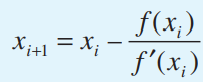

Éste método es el más convergente de todos, por lo cual encontrará una solución en menos iteraciones que otros métodos.

          x      f(x)     f'(x)
0  0.000000  1.000000 -2.000000
1  0.500000  0.106531 -1.606531
2  0.566311  0.001305 -1.567616
Raiz aproximada de x =  0.5671431650348622


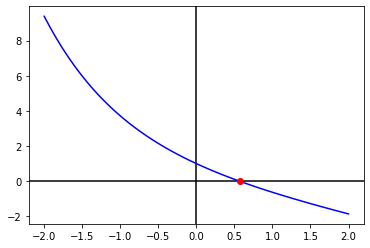

In [6]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def f(x): 
    return np.exp(-x) - x

def df(x): 
    return -np.exp(-x) - 1
def NewtonRaphson(x, tol):
  res = pd.DataFrame(columns = ['x' , 'f(x)', "f'(x)"])
  i = 0
  while(abs(f(x)) > tol): 
      res.loc[i]=[x, f(x), df(x)]
      i += 1
      x = x - (f(x)/df(x))
  print(res)
  print("Raiz aproximada de x = ",x)

  xi = np.linspace(-2, 2, 51)
  yi = f(xi)

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(xi, yi, color="blue")
  plt.plot(x, f(x), marker="o",color="red")

  plt.show()

NewtonRaphson(x=0, tol=0.0005)

# MÉTODO DE LA SECANTE

A diferencia de Newton, secante empleará diferencias divididas en lugar de la derivada para encontrar una solución, por lo cual es necesario conocer dos valores iniciales de la función como se puede ver a continuación:

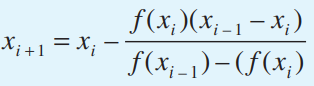

Secante es apropiado cuando la derivada de alguna función sea complicada de determinar.

          x      f(x)
0  0.000000  1.000000
1  0.100000  0.804837
2  0.512393  0.086667
3  0.562160  0.007817
4  0.567093  0.000078
Solucion aproximada de x =  0.5670934709868598


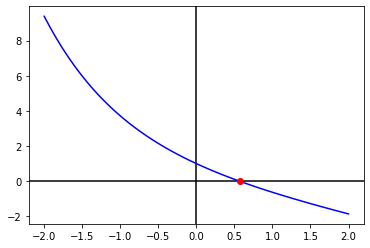

In [7]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def f(x): 
    return np.exp(-x) - x

def Secante(x0, x, tol):
  res = pd.DataFrame(columns = ['x' , 'f(x)'])
  i = 2
  res.loc[0]=[x0, f(x0)]
  res.loc[1]=[x, f(x)]
  while(abs(f(x)) > tol):
      x1 = x
      x = x1 - (f(x1) * (x0 - x1))/(f(x0) - f(x1))
      res.loc[i]=[x, f(x)]
      i += 1
      x0 = x1
  print(res)
  print("Solucion aproximada de x = ",x)

  xi = np.linspace(-2, 2, 51)
  yi = f(xi)

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")
  plt.plot(xi, yi, color="blue")
  plt.plot(x, f(x), marker="o",color="red")

  plt.show()

Secante(x0=0, x=0.1, tol=0.0005)

# MÉTODO BABILÓNICO

In [8]:
import math
import pandas as pd

def Babilonico(P, tol):
    res = pd.DataFrame(columns = ['#', 'x' , 'Error'])
    x = P
    i = 0 
    while(True):
        x0 = x
        x = (x0 + P/x0)/2
        E = abs((x - x0)/x0)
        res.loc[i]=[i, x, E]
        i += 1
        if(E < tol):
            break
    print(res)
    print("Aproximacion de la raiz cuadrada de",P,"es:",x)
    print("Valor real:", math.sqrt(P))

P = float(input("Raiz a calcular: "))
Babilonico(P, tol=0.00001)

Raiz a calcular: 4
     #        x         Error
0  0.0  2.50000  3.750000e-01
1  1.0  2.05000  1.800000e-01
2  2.0  2.00061  2.409280e-02
3  3.0  2.00000  3.047387e-04
4  4.0  2.00000  4.646114e-08
Aproximacion de la raiz cuadrada de 4.0 es: 2.000000000000002
Valor real: 2.0
